<a href="https://colab.research.google.com/github/roshanakkarimi/Classification_wineData/blob/main/Classification_wineData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We first import the dataset we are going to use.

In [1]:
#let's import the sklearn library

import sklearn
#let's print out the version of scikit-learn


#this imports the datasets module, which has useful datasets
from sklearn import datasets

# Load the dataset from scikit learn
wine = datasets.load_wine()

# Linear Models for Classification: Wine Dataset

### Dataset description

We will be working with a dataset on wines from the UCI machine learning repository
(http://archive.ics.uci.edu/ml/datasets/Wine). It contains data for 178 instances.
The dataset is the results of a chemical analysis of wines grown in the same region
in Italy but derived from three different cultivars. The analysis determined the
quantities of 13 constituents found in each of the three types of wines.

### The features in the dataset are:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
-Proline



Now let's understand a little bit the data.

In [2]:
#let's print the data matrix
print(wine.data)

#let's print the dimension of the data matrix
print(wine.data.shape)

#let's print the target (labels)
print(wine.target)

#let's print the features names
print(wine.feature_names)

#let's print the targets names names
print(wine.target_names)

#let's print the description of the dataset
print(wine.DESCR)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
(178, 13)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0'

To simplify a bit the problem (and the presentation), we are going to classify class "1" vs the other two classes (0 and 2). We are going to relabel the other classes (0 and 2) as "-1".

For convenience, let's save the instances (vectors of features) in matrix $\mathbf{X}$ and the targets into a vector $\mathbf{Y}$.

In [3]:
X = wine.data
Y = wine.target

#let's print out the matrix of instances and the vector of targets, just to make sure that everything looks ok
print("Matrix of instances")
print(X)

print("Vector of labels")
print(Y)

Matrix of instances
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Vector of labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Let's relabel the labels for classes 0 and 2 as stated before.

In [4]:
#let's relabel classes 0 and 2 as -1
for i in range(len(Y)):
    if Y[i] != 1:
        Y[i] = -1


#let's print the new vector Y
print(Y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


## Data Preprocessing and Split into Training and Testing ##

Before we actually learn the model, it is important that we perform two operations:
1. split the data into a training set and a test set
2. normalize the features

**Note**: some of there operations can be done with scikit-learn functions, but we do them "manually" to get a better understanding of what is going on.

We now want to split the data into training and testing. Let's say we keep 50% of the data for training and 50% for testing. How do we split the data?

What about keeping the first 50% of the raws for training and the last 50% of rows for testing? Is it a good idea?

Solution: randomly permute the rows, and then split as suggested before.

**Note**: since we use randomization in some parts, let's fix a random seed (so that the entire procedure is reproducible, hopefully).

In [5]:
# we need to import numpy
import numpy as np

# set the random seed to your ID number
IDnumber = 1
np.random.seed(IDnumber)

#let's generate a permutation among the number of rows
m = wine.data.shape[0]
print(m)
permutation = np.random.permutation(m)
print(permutation)
X_perm = X[permutation]
Y_perm = Y[permutation]

#let's print Y_perm
print(Y_perm)

178
[161 117  19  69  53 138 112  14 160 107  11   4 108  42  84 113 152  35
 105  31  51 126 130  73  40 162  47  29  16 147  97 159 151   5 120  94
  91  81 114  48  54  59 165  39  56  44  78  33  18  58 127 172 148  12
  90  95  28 124 135  66 123  17 164  89 170  13 106  45  93  36 171 166
 168 175 118  75  21 173   2  70 163   6  85   0 136  77  65  55  99  88
 102  46  62  74  92 176 116 119 125 110  10  34  32 145  38  83 154 177
  27 100  23 103  67   9 150 104 122 132 153  87  98 111 167 158  64  15
  82  41 143 109  80  52  26  76  43  24   3 149  49 131 169  30 121 115
 155   8  60 128   1  57  22  61  63   7 174 141  86  96  68  50 142 157
 156 139 146 101  20  25 134  71 129 144  79 133 137  72 140  37]
[-1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1  1 -1  1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1
 -1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1  1

Let's split the data and save into 2 new data matrices/vectors.

In [6]:
fraction_train = 0.5
fraction_test = 1 - fraction_train

m_training = int(X_perm.shape[0] * fraction_train)

print(m_training)

m_test = int(X_perm.shape[0] - m_training)
print(m_test)

X_training = X_perm[:m_training,:]
print(X_training.shape)
Y_trainnig = Y_perm[:m_training]

X_test = X_perm[m_training:,:]
Y_test = Y_perm[m_training:]

print(Y_test)

89
89
(89, 13)
[ 1  1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1
 -1 -1  1  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1]


We now center and scale the data to have unit variance. This is an important step for the stability of the computation and for other reasons. We are going to use the standard scaler from scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [7]:
#load the StandardScaler module
from sklearn.preprocessing import StandardScaler

# we first "learn" the scaler function using the training data
scalar = StandardScaler().fit(X_training)

# we then apply the scaling function to both training and test data, since we want to simulate what happens when we have data for training and we have future data
X_training_scaled = scalar.transform(X_training)
X_test_scaled = scalar.transform(X_test)

#let's print the scaled version of X_traing_scaled
print(X_test_scaled)

[[-1.71077794 -0.21378804  0.32769344 ...  0.21593399  0.15134062
  -0.25927744]
 [-0.8671697   0.14960975  0.32769344 ... -0.71382533  1.06377811
  -0.98697064]
 [ 1.59134576  1.21184942 -0.3676243  ...  0.40188586  1.15067692
   0.89841628]
 ...
 [ 0.51875814 -0.58650371 -0.52213935 ...  0.12295806  0.19479003
  -0.88473275]
 [-0.15612846  0.48505385  1.25478376 ... -0.85328923 -0.48591731
  -0.49983718]
 [-0.0115099  -0.5958216   0.67535231 ...  0.77378959 -0.19625461
   1.01869614]]


## Learning a Model ##

We now need to decide which model/algorithm we are going to use for our classification task. There are several models available in scikit-learn: https://scikit-learn.org/0.23/index.html

We are going to start from the simplest models, that is, linear models: https://scikit-learn.org/0.23/modules/classes.html#module-sklearn.linear_model

How do we find the best hypothesis?

We need to define a loss function and then use Empirical Risk Minimization (ERM).

What loss function does it make sense to use?

But what is the actual algorithm? We are going to consider the **Perceptron** algorithm: https://scikit-learn.org/0.23/modules/generated/sklearn.linear_model.Perceptron.html

Let's load the corresponding module in scikit-learn

In [8]:
from sklearn.linear_model import Perceptron

Let's us the Perceptron algorithm as implemented in scikit-learn. It proceeds in iterations.

The Perceptron has several parameters, some of which we will understand later on. An important one is $\texttt{tol}$, that represents how much the training error should improve in one iteration for the algorithm to continue.

In [9]:
#let's learn a model using Perceptron

#we first define the classifier, fixing the random state for reproducibility
perceptron_classifier = Perceptron(random_state=IDnumber, tol=1e-3)

#let's now learn the classifier (i.e., run the perceptron to fix the weights)
perceptron_classifier.fit(X_training_scaled, Y_trainnig)

Perceptron(random_state=1)

Let's print out the model we learned.

In [10]:
print("Coefficient of features (vector w):")
print(perceptron_classifier.coef_)

print("Bias of the model(value b:)")
print(perceptron_classifier.intercept_)

Coefficient of features (vector w):
[[-4.96848696 -1.74558664 -4.09074263  4.03186637 -1.72682244  0.3485182
   2.99148804 -0.34645642  2.28746151 -6.78434457  3.53914454  1.1485614
  -6.59931033]]
Bias of the model(value b:)
[-6.]


How well does our method perform?

We need to compute the training error of the hypothesis $h_S$ we learned from the training set $S$. There is no function in python to compute the training error $L_S(h_S)$. However, there is a function to compute the \emph{score}, that for the 0-1 loss corresponds to $1 - L_S(h_S)$.

In [11]:
#let's compute the training error
training_error = 1. - perceptron_classifier.score(X_training_scaled, Y_trainnig)

#let's print the training error
print("Training error:", training_error)

Training error: 0.0


But we don't care about the training error... we are interested in the generalization error! How do we estimate it? Let's use some data that we did not use for training, that is what we called test data.

In [12]:
#let's compute the test error
test_error = 1. - perceptron_classifier.score(X_test_scaled, Y_test)



#let's print the test error
print("Test error:", test_error)

Test error: 0.0449438202247191


## Impact of the amount of training data ##

We will now try to understand the impact of the amount of data we have for training.

To do this, we are going to train a model using a subset of the data with $10*i$ samples, for $i=1,2,3,\dots,10$, and then compute the training error and the test error.

In [14]:
#total number of samples, useful for later on
m_total = X.shape[0]

#two lists where to save the training error and the test error, useful for plotting
train_errors = list()
test_errors = list()

#let's define the learner we use in this part
perceptron_class = Perceptron(random_state = IDnumber, tol=1e-3 )

for i in range(1,10):
    # we now repeat all the previous steps
    # split into training and test
    X_training = X_perm[:10*i,:]
    Y_trainnig = Y_perm[:10*i]

    X_test = X_perm[10*i:,:]
    Y_test = Y_perm[10*i:]

    #scale the data according to the training test, for both training and testing
    X_training_scaled = scalar.transform(X_training)
    X_test_scaled = scalar.transform(X_test)

    #let's now learn the classifier (i.e., run the perceptron to fix the weights
    perceptron_class.fit(X_training_scaled, Y_trainnig)

    #let's compute the training error
    training_error = 1. - perceptron_class.score(X_training_scaled, Y_trainnig)
    test_error = 1. - perceptron_class.score(X_test_scaled, Y_test)

    #let's save the errors
    test_errors.append(test_error)
    train_errors.append(training_error)

print(train_errors)
print(test_errors)



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.10119047619047616, 0.14556962025316456, 0.05405405405405406, 0.06521739130434778, 0.078125, 0.06779661016949157, 0.04629629629629628, 0.061224489795918324, 0.05681818181818177]


Now let's plot the training and test error as a function of the training dataset size.

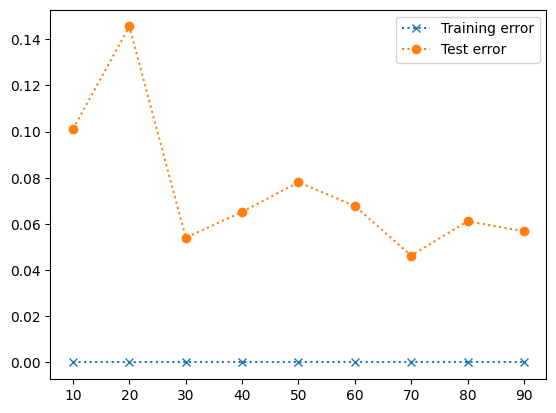

In [15]:
#the following is to have the plots appearing inline
%matplotlib inline

#import the pyplot module from matplotlib for plotting (functions are similar to matlab)
import matplotlib.pyplot as plt

x_axis=range(10,100,10)
plt.plot(x_axis,train_errors,'x:')
plt.plot(x_axis,test_errors,'o:')
plt.legend(["Training error","Test error"])

## Impact of initial conditions by the perceptron

Note that the solution found by the Perceptron algorithm depends on the initial condition. Let's learn a model with a different random seed for the Perceptron and see how different the model is from the previous one.

In [29]:
#let's learn a new model using Perceptron

#we first define the classifier, fixing the random state for reproducibility
perceptron_classifier = Perceptron(random_state=IDnumber, tol=1e-3)

#let's now learn the classifier (i.e., run the perceptron to fix the weights)
perceptron_classifier.fit(X_training_scaled, Y_trainnig)

print("Coefficient of features (vector w):")
print(perceptron_classifier.coef_)

print("Bias of the model(value b:)")
print(perceptron_classifier.intercept_)


Coefficient of features (vector w):
[[-5.20789296 -0.58859762 -2.3737158   2.92449598  0.30461148  1.14957111
   2.06191879  0.1192411  -0.04483348 -7.33648239  4.65182617 -1.39542562
  -3.57028486]]
Bias of the model(value b:)
[-3.]


## Impact of normalization

Let's try to understand what the impact of scaling data is. Let's learn a model without without normalizing the data.

In [20]:
#total number of samples, useful for later on
m_total = X.shape[0]

#two lists where to save the training error and the test error, useful for plotting
train_errors = list()
test_errors = list()

#let's define the learner we use in this part
perceptron_class = Perceptron(random_state = IDnumber, tol=1e-15 )

for i in range(1,10):
    # we now repeat all the previous steps
    # split into training and test
    X_training = X_perm[:10*i,:]
    Y_trainnig = Y_perm[:10*i]

    X_test = X_perm[10*i:,:]
    Y_test = Y_perm[10*i:]

    #let's now learn the classifier (i.e., run the perceptron to fix the weights
    perceptron_class.fit(X_training, Y_trainnig)

    #let's compute the training error
    training_error = 1. - perceptron_class.score(X_training, Y_trainnig)
    test_error = 1. - perceptron_class.score(X_test, Y_test)

    #let's save the errors
    test_errors.append(test_error)
    train_errors.append(training_error)

print(train_errors)
print(test_errors)

[0.4, 0.6, 0.33333333333333337, 0.6, 0.30000000000000004, 0.31666666666666665, 0.3285714285714286, 0.22499999999999998, 0.33333333333333337]
[0.39880952380952384, 0.6012658227848101, 0.41216216216216217, 0.6014492753623188, 0.328125, 0.30508474576271183, 0.36111111111111116, 0.30612244897959184, 0.3522727272727273]


Without scaling, your model can have training errors because many machine learning algorithms are sensitive to the scale and range of the input features.
